<a href="https://colab.research.google.com/github/Ejeat12/Profolio/blob/main/Twins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# For this project, I will attempt to build a cnn model that is able to predict whether a picture is of,
#Rihanna:
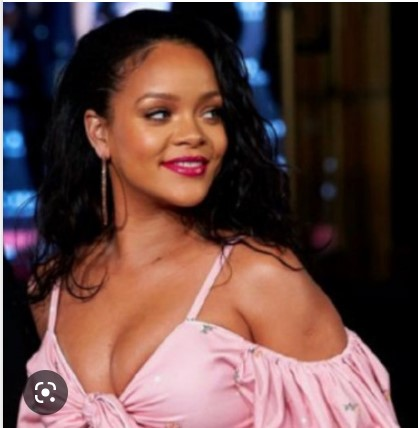 
# And her lookalike:https://www.instagram.com/priscila.beatrice/?hl=en

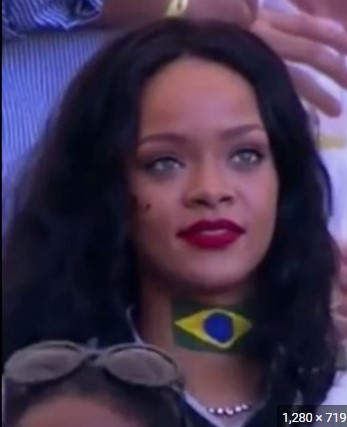


In [ ]:

import zipfile
!wget "https://storage.googleapis.com/real_fake/twins%20dataset.zip"
# Unzip the downloaded file
zip_ref = zipfile.ZipFile("/content/twins dataset.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-01-06 03:33:04--  https://storage.googleapis.com/real_fake/twins%20dataset.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.62.128, 142.250.73.240, 172.253.115.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.62.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2073653157 (1.9G) [application/x-zip-compressed]
Saving to: ‘twins dataset.zip.1’

twins dataset.zip.1 100%[===================>]   1.93G   182MB/s    in 11s     

2023-01-06 03:33:16 (172 MB/s) - ‘twins dataset.zip.1’ saved [2073653157/2073653157]



In [ ]:
# Whats in our real_fake zip folder
a = !ls /content/real_fake/real_fake
b = !ls /content/real_fake/real_fake/train
c = !ls /content/real_fake/real_fake/test
print(f"{a} is what is inside our real_fake zip folder")
print(f"{b} is what's inside our trainining folder")
print(f"{c} is whats inside our testing folder")


['test  train'] is what is inside our real_fake zip folder
['fake  real'] is what's inside our trainining folder
['fake  real'] is whats inside our testing folder


# Inspecting the data

In [ ]:
# How many images are in our file. This is the same for both real and fake folder paths
import os
# Define data directory paths
train_dir = "/content/real_fake/real_fake/train/real"
test_dir = "/content/real_fake/real_fake/test/real"
num_train_pics = len(os.listdir(train_dir))
num_test_pics = len(os.listdir(test_dir))
print(f"{num_train_pics} is the number of training pictures")
print(f"{num_test_pics} is the number of testing pictures")

492 is the number of training pictures
116 is the number of testing pictures


#preprocessing our data

In [ ]:

# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("/content/real_fake/real_fake/train") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['fake' 'real']


In [ ]:
# create train and test data generators and normalize the data(get them between 0 and 1)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255)


In [ ]:
# Create ImageDataGenerator training instance with data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.) 

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)


     

In [ ]:
# Import data and augment it from training directory
train_dir = "/content/real_fake/real_fake/train"
test_dir = "/content/real_fake/real_fake/test"
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=True) 

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) 

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 979 images belonging to 2 classes.
Non-augmented training images:
Found 979 images belonging to 2 classes.
Unchanged test images:
Found 232 images belonging to 2 classes.


In [ ]:
# Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() 

# Build a better cnn model

In [ ]:
# Create a CNN model (same as Tiny VGG but for binary classification - https://poloclub.github.io/cnn-explainer/ )
import tensorflow as tf

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential
     
model = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)), # same input shape as our images
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history = model.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
31/31 [==============================] - 61s 2s/step - loss: 0.5350 - accuracy: 0.7211 - val_loss: 0.3928 - val_accuracy: 0.7586
Epoch 2/5
31/31 [==============================] - 51s 2s/step - loss: 0.4286 - accuracy: 0.7804 - val_loss: 0.2041 - val_accuracy: 0.9181
Epoch 3/5
31/31 [==============================] - 50s 2s/step - loss: 0.4009 - accuracy: 0.7896 - val_loss: 0.2164 - val_accuracy: 0.8879
Epoch 4/5
31/31 [==============================] - 50s 2s/step - loss: 0.3941 - accuracy: 0.7916 - val_loss: 0.1634 - val_accuracy: 0.9267
Epoch 5/5
31/31 [==============================] - 52s 2s/step - loss: 0.3713 - accuracy: 0.8008 - val_loss: 0.1986 - val_accuracy: 0.9052


# Evaluating training curves

In [ ]:
model.evaluate(test_data)

8/8 [==============================] - 11s 1s/step - loss: 0.1986 - accuracy: 0.9052


[0.19859041273593903, 0.9051724076271057]

In [ ]:

# Plot the validation and training data separately
import matplotlib.pyplot as plt
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

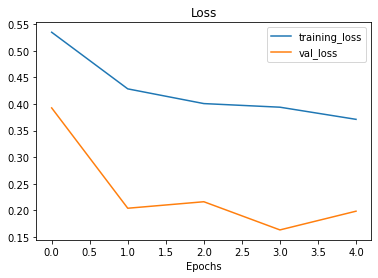

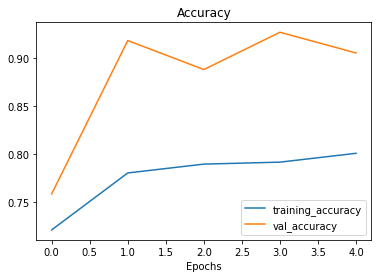

In [ ]:
# Check out the loss curves of model
plot_loss_curves(history)

In [ ]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

# Upload a new image the model hasnt seen before

In [ ]:
# Get helper functions
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
from helper_functions import unzip_data

--2023-01-06 03:52:36--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-01-06 03:52:36 (108 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
# Load in and preprocess our custom image
unzip_data("/content/real_fake_pics.zip")

real = load_and_prep_image("/content/Rihanna-braids.jpg")
real

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.02734594, 0.07048319, 0.0077381 ],
        [0.01628151, 0.05941877, 0.        ],
        [0.02762605, 0.0707633 , 0.00801821],
        ...,
        [0.02352941, 0.0627451 , 0.03137255],
        [0.02717142, 0.0663871 , 0.03501455],
        [0.01971415, 0.05892983, 0.02755728]],

       [[0.03739871, 0.0883791 , 0.01779087],
        [0.03731368, 0.08829407, 0.01770583],
        [0.04259579, 0.09357618, 0.02298795],
        ...,
        [0.02923669, 0.07629552, 0.03707983],
        [0.0328787 , 0.07993752, 0.04072183],
        [0.02569657, 0.07275539, 0.0335397 ]],

       [[0.03396359, 0.10171568, 0.00903362],
        [0.04598089, 0.11373299, 0.01881002],
        [0.05417417, 0.12192626, 0.02364195],
        ...,
        [0.01978677, 0.08361731, 0.02370834],
        [0.03894841, 0.10277894, 0.04286998],
        [0.02851401, 0.09234454, 0.03243558]],

       ...,

       [[0.7010094 , 0.7984949 , 0.8348331 ],
        [0.42

In [ ]:

# Add an extra axis
print(f"Shape before new dimension: {real.shape}")
real = tf.expand_dims(real, axis=0) 
print(f"Shape after new dimension: {real.shape}")
real

Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.02734594, 0.07048319, 0.0077381 ],
         [0.01628151, 0.05941877, 0.        ],
         [0.02762605, 0.0707633 , 0.00801821],
         ...,
         [0.02352941, 0.0627451 , 0.03137255],
         [0.02717142, 0.0663871 , 0.03501455],
         [0.01971415, 0.05892983, 0.02755728]],

        [[0.03739871, 0.0883791 , 0.01779087],
         [0.03731368, 0.08829407, 0.01770583],
         [0.04259579, 0.09357618, 0.02298795],
         ...,
         [0.02923669, 0.07629552, 0.03707983],
         [0.0328787 , 0.07993752, 0.04072183],
         [0.02569657, 0.07275539, 0.0335397 ]],

        [[0.03396359, 0.10171568, 0.00903362],
         [0.04598089, 0.11373299, 0.01881002],
         [0.05417417, 0.12192626, 0.02364195],
         ...,
         [0.01978677, 0.08361731, 0.02370834],
         [0.03894841, 0.10277894, 0.04286998],
         [0.02851401, 0.09234454, 0.03243558]],

        ...,

        [[0.7010094 , 0.7984949 , 

In [ ]:
# Make a prediction on custom image tensor
pred = model.predict(real)
pred

1/1 [==============================] - 0s 191ms/step


array([[0.69755685]], dtype=float32)

In [ ]:
# We can index the predicted class by rounding the prediction probability
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'real'

In [ ]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"The model Predicts it is: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 17ms/step


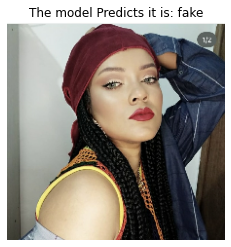

In [ ]:
# Test our model on the "fake rihanna" with a image it has not seen before. source image:https://www.instagram.com/p/CK7CwPvFbhB/?hl=en
pred_and_plot(model, "/content/IMG_7595.PNG", class_names)

1/1 [==============================] - 0s 32ms/step


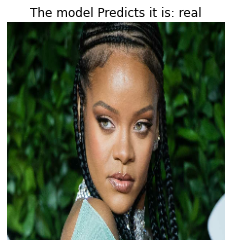

In [ ]:
# Test our model on the real rihanna with a image it has not seen before. source image:https://allhiphop.com/news/rihannas-new-box-braids-hairstyle-divides-the-net/
pred_and_plot(model, "/content/Rihanna-braids.jpg", class_names)